In [14]:
import numpy as np
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
test_sets = ['all', 'far', 'close']
listeners = ['test']
data_frame = None
ci_data_frame = None
for test_set in test_sets:
    data = None
    for listener in listeners:
        if data == None:
            new_data = np.load('./output/colors/'+str(test_set)+'/human_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
            data = {}
            data['prob'] = new_data['prob']
            data['length'] = new_data['length']
            data['model'] = ['human']*len(data['prob'])
            acc_data = {}
            acc_data['acc'] = new_data['acc']
            acc_data['model'] = ['human']*len(acc_data['acc'])
        else:
            temp_data = np.load('./output/colors/'+str(test_set)+'/human_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
            temp_acc_data = temp_data.copy()
            temp_perp_data = temp_data.copy()
            temp_data['model'] = ['human']*len(temp_data['prob'])
            temp_acc_data['model'] = ['human']*len(temp_data['acc'])
            for key in temp_data.keys():
                if key in ('prob', 'length', 'model'):
                    data[key] = data[key]+temp_data[key]
                if key in ('acc', 'model'):
                    acc_data[key] = acc_data[key]+temp_acc_data[key]
        temp_data = np.load('./output/colors/'+str(test_set)+'/s_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_perp_data = temp_data.copy()
        temp_data['model'] = ['$S_0$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S_0$']*len(temp_acc_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'model'):
                acc_data[key] = acc_data[key]+temp_acc_data[key]
        temp_data = np.load('./output/colors/'+str(test_set)+'/s_context_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_perp_data = temp_data.copy()
        temp_data['model'] = ['$S\'_0$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S\'_0$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'model'):
                acc_data[key] = acc_data[key]+temp_acc_data[key]
        temp_data = np.load('./output/colors/'+str(test_set)+'/srr5_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_perp_data = temp_data.copy()
        temp_data['model'] = ['$S_{RSA-SRR}$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S_{RSA-SRR}$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'model'):
                acc_data[key] = acc_data[key]+temp_acc_data[key]
        temp_data = np.load('./output/colors/'+str(test_set)+'/pretrained_len_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_data['model'] = ['$S_{RSA-Am}$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S_{RSA-Am}$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'model'):
                acc_data[key] = acc_data[key]+temp_acc_data[key]
        temp_data = np.load('../updated_reinforce/emergent/output/colors/'+str(test_set)+'/reinforce_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_data['model'] = ['$S_{RL}$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S_{RL}$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob',  'length', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'model'):
                acc_data[key] = acc_data[key]+temp_acc_data[key]
     
    data['listener'] = ['test']*len(data['model'])
    acc_data['listener'] = ['test']*len(acc_data['model'])
    
    if test_set == 'all':
        test_set = 'random'
    
    data['data'] = [str(test_set)]*len(data['model'])
    acc_data['data'] = [str(test_set)]*len(acc_data['model'])
    
    try:
        for key in data_frame.keys():
            data_frame[key] = data_frame[key]+data[key]
        for key in acc_data_frame.keys():
            acc_data_frame[key] = acc_data_frame[key]+acc_data[key]
    except:
        data_frame = data
        acc_data_frame = acc_data

In [68]:
colors_data = pd.DataFrame(data_frame)
colors_acc_data = pd.DataFrame(acc_data_frame)
colors_test_data = colors_data[colors_data['listener'] == 'test']
colors_acc_test_data = colors_acc_data[colors_acc_data['listener'] == 'test']
colors_random_test_data = colors_test_data[colors_test_data['data'] == 'random']
colors_random_acc_test_data = colors_acc_test_data[colors_acc_test_data['data'] == 'random']
colors_test_data_1 = colors_test_data[colors_test_data['data'] != 'random']

In [72]:
test_sets = ['random', 'both-needed', 'shape-needed', 'color-needed', 'either-ok']
listeners = ['test']
data_frame = None
ci_data_frame = None
for test_set in test_sets:
    data = None
    for listener in listeners:
        if data == None:
            new_data = np.load('./output/single/'+str(test_set)+'/s_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
            data = {}
            data['prob'] = new_data['prob']
            data['length'] = new_data['length']
            data['shapes'] = new_data['shapes']
            data['colors'] = new_data['colors']
            data['model'] = ['$S_0$']*len(data['prob'])
            acc_data = {}
            acc_data['acc'] = new_data['acc']
            acc_data['ci_acc'] = new_data['CI']
            acc_data['time'] = new_data['times']
            acc_data['model'] = ['$S_0$']*len(acc_data['acc'])
        else:
            temp_data = np.load('./output/single/'+str(test_set)+'/s_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
            temp_acc_data = temp_data.copy()
            temp_data['model'] = ['$S_0$']*len(temp_data['prob'])
            temp_acc_data['model'] = ['$S_0$']*len(temp_data['acc'])
            for key in temp_data.keys():
                if key in ('prob', 'length', 'shapes', 'colors', 'model'):
                    data[key] = data[key]+temp_data[key]
                if key in ('acc', 'CI', 'times', 'model'):
                    alt_key = key
                    if key == 'CI':
                        alt_key = 'ci_acc'
                    if key == 'times':
                        alt_key = 'time'
                    acc_data[alt_key] = acc_data[alt_key]+temp_acc_data[key]
        temp_data = np.load('./output/single/'+str(test_set)+'/s_context_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_data['model'] = ['$S\'_{0}$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S\'_{0}$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'shapes', 'colors', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'CI', 'times', 'model'):
                alt_key = key
                if key == 'CI':
                    alt_key = 'ci_acc'
                if key == 'times':
                    alt_key = 'time'
                acc_data[alt_key] = acc_data[alt_key]+temp_acc_data[key]
        temp_data = np.load('./output/single/'+str(test_set)+'/srr5_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_data['model'] = ['$S_{RSA-SRR}$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S_{RSA-SRR}$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'shapes', 'colors', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'CI', 'times', 'model'):
                alt_key = key
                if key == 'CI':
                    alt_key = 'ci_acc'
                if key == 'times':
                    alt_key = 'time'
                acc_data[alt_key] = acc_data[alt_key]+temp_acc_data[key]
        temp_data = np.load('./output/single/'+str(test_set)+'/rsa_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_data['model'] = ['$S_{RSA-Full}$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S_{RSA-Full}$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'shapes', 'colors', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'CI', 'times', 'model'):
                alt_key = key
                if key == 'CI':
                    alt_key = 'ci_acc'
                if key == 'times':
                    alt_key = 'time'
                acc_data[alt_key] = acc_data[alt_key]+temp_acc_data[key]
        temp_data = np.load('./output/single/'+str(test_set)+'/pretrained_len_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_data['model'] = ['$S_{RSA-Am}$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S_{RSA-Am}$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'shapes', 'colors', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'CI', 'times', 'model'):
                alt_key = key
                if key == 'CI':
                    alt_key = 'ci_acc'
                if key == 'times':
                    alt_key = 'time'
                acc_data[alt_key] = acc_data[alt_key]+temp_acc_data[key]
        temp_data = np.load('./output/single/'+str(test_set)+'/new_REINFORCE_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_acc_data = temp_data.copy()
        temp_data['model'] = ['$S_{RL}$']*len(temp_data['prob'])
        temp_acc_data['model'] = ['$S_{RL}$']*len(temp_data['acc'])
        for key in temp_data.keys():
            if key in ('prob', 'length', 'shapes', 'colors', 'model'):
                data[key] = data[key]+temp_data[key]
            if key in ('acc', 'ci_acc', 'time', 'model'):
                acc_data[key] = acc_data[key]+temp_acc_data[key]
        
    data['listener'] = ['test']*int(len(data['prob']))
    acc_data['listener'] = ['test']*int(len(acc_data['acc']))
    
    data['data'] = [str(test_set)]*len(data['model'])
    acc_data['data'] = [str(test_set)]*len(acc_data['model'])
    ci = acc_data['ci_acc']
    num_ci_listeners = len(ci[0])
    ci_data = {'ci_acc': np.array([np.array(ci)[0:9,:].mean(0), 
                    np.array(ci)[10:19,:].mean(0), 
                    np.array(ci)[20:29,:].mean(0), 
                    np.array(ci)[30:39,:].mean(0), 
                    np.array(ci)[40:49,:].mean(0), 
                    np.array(ci)[50:59,:].mean(0)]).flatten(), 
            'model': ['$S_0$']*num_ci_listeners+['$S\'_{0}$']*num_ci_listeners+['$S_{RSA-SRR}$']*num_ci_listeners
               +['$S_{RSA-Full}$' ]*num_ci_listeners+['$S_{RSA-Am}$']*num_ci_listeners+['$S_{RL}$']*num_ci_listeners}
    ci_data['data'] = [str(test_set)]*len(ci_data['model'])
    
    try:
        for key in data_frame.keys():
            data_frame[key] = data_frame[key]+data[key]
        for key in acc_data_frame.keys():
            acc_data_frame[key] = acc_data_frame[key]+acc_data[key]
        for key in ci_data_frame.keys():
            ci_data_frame[key] = np.append(ci_data_frame[key],ci_data[key])
    except:
        data_frame = data
        acc_data_frame = acc_data
        ci_data_frame = ci_data

In [74]:
shapeworld_data = pd.DataFrame(data_frame)
shapeworld_acc_data = pd.DataFrame(acc_data_frame)
shapeworld_ci_data = pd.DataFrame(ci_data_frame)
shapeworld_test_data = shapeworld_data[shapeworld_data['listener'] == 'test']
shapeworld_acc_test_data = shapeworld_acc_data[shapeworld_acc_data['listener'] == 'test']
shapeworld_random_data = shapeworld_data[shapeworld_data['data'] == 'random']
shapeworld_both_needed_data = shapeworld_data[shapeworld_data['data'] == 'both-needed']
shapeworld_color_needed_data = shapeworld_data[shapeworld_data['data'] == 'color-needed']
shapeworld_shape_needed_data = shapeworld_data[shapeworld_data['data'] == 'shape-needed']
shapeworld_either_ok_data = shapeworld_data[shapeworld_data['data'] == 'either-ok']
shapeworld_random_test_data = shapeworld_test_data[shapeworld_test_data['data'] == 'random']
shapeworld_random_acc_test_data = shapeworld_acc_test_data[shapeworld_acc_test_data['data'] == 'random']
shapeworld_test_data_1 = shapeworld_test_data[shapeworld_test_data['data'] != 'random']
shapeworld_random_ci_data = shapeworld_ci_data[shapeworld_ci_data['data'] == 'random']
shapeworld_both_needed_ci_data = shapeworld_ci_data[shapeworld_ci_data['data'] == 'both-needed']
shapeworld_color_needed_ci_data = shapeworld_ci_data[shapeworld_ci_data['data'] == 'color-needed']
shapeworld_shape_needed_ci_data = shapeworld_ci_data[shapeworld_ci_data['data'] == 'shape-needed']
shapeworld_either_ok_ci_data = shapeworld_ci_data[shapeworld_ci_data['data'] == 'either-ok']

In [76]:
test_sets = ['new combo', 'new color', 'new shape']
tss = ['new_combo', 'new_color', 'new_shape']
listeners = ['test']
data_frame = None
ci_data_frame = None
for test_set, ts in zip(test_sets,tss):
    data = None
    for listener in listeners:
        if data == None:
            new_data = np.load('./output/single/generalization_'+ts+'/s_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
            data = {}
            data['loss'] = new_data['loss']
            data['acc'] = new_data['acc']
            data['ci_acc'] = new_data['CI']
            data['time'] = new_data['times']
            data['model'] = ['$S_0$']*len(new_data['loss'])
            
        else:
            temp_data = np.load('./output/single/generalization_'+ts+'/s_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
            temp_data['model'] = ['$S_0$']*len(temp_data['loss'])
            for key in data.keys():
                alt_key = key
                if key == 'ci_acc':
                    alt_key = 'CI'
                if key == 'time':
                    alt_key = 'times'
                data[key] = data[key]+temp_data[alt_key]
        temp_data = np.load('./output/single/generalization_'+ts+'/s_context_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_data['model'] = ['$S\'_{0}$']*len(temp_data['loss'])
        for key in data.keys():
            alt_key = key
            if key == 'ci_acc':
                alt_key = 'CI'
            if key == 'time':
                alt_key = 'times'
            data[key] = data[key]+temp_data[alt_key]
        temp_data = np.load('./output/single/generalization_'+ts+'/srr5_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_data['model'] = ['$S_{RSA-SRR}$']*len(temp_data['loss'])
        for key in data.keys():
            alt_key = key
            if key == 'ci_acc':
                alt_key = 'CI'
            if key == 'time':
                alt_key = 'times'
            data[key] = data[key]+temp_data[alt_key]
        temp_data = np.load('./output/single/generalization_'+ts+'/rsa_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_data['model'] = ['$S_{RSA-Full}$']*len(temp_data['loss'])
        for key in data.keys():
            alt_key = key
            if key == 'ci_acc':
                alt_key = 'CI'
            if key == 'time':
                alt_key = 'times'
            data[key] = data[key]+temp_data[alt_key]
        temp_data = np.load('./output/single/generalization_'+ts+'/pretrained_len_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_data['model'] = ['$S_{RSA-Am}$']*len(temp_data['loss'])
        for key in data.keys():
            alt_key = key
            if key == 'ci_acc':
                alt_key = 'CI'
            if key == 'time':
                alt_key = 'times'
            data[key] = data[key]+temp_data[alt_key]
        temp_data = np.load('./output/single/generalization_'+ts+'/new_REINFORCE_'+str(listener)+'_metrics.npy', allow_pickle='TRUE').item()
        temp_data['model'] = ['$S_{RL}$']*len(temp_data['loss'])
        for key in data.keys():
            data[key] = data[key]+temp_data[key]
            
    data['listener'] = ['test']*len(data['acc'])
    
    data['data'] = [str(test_set)]*len(data['model'])
    ci = data['ci_acc']
    num_ci_listeners = len(ci[0])
    ci_data = {'ci_acc': np.array([np.array(ci)[0:9,:].mean(0), 
                    np.array(ci)[10:19,:].mean(0), 
                    np.array(ci)[20:29,:].mean(0), 
                    np.array(ci)[30:39,:].mean(0), 
                    np.array(ci)[40:49,:].mean(0)]).flatten(), 
            'model': ['$S_0$']*num_ci_listeners+['$S\'_{0}$']*num_ci_listeners+['$S_{RSA-SRR}$']*num_ci_listeners
               +['$S_{RSA-Full}$']*num_ci_listeners+['$S_{RSA-Am}$']*num_ci_listeners+['$S_{RL}$']*num_ci_listeners}
    ci_data['data'] = [str(test_set)]*len(ci_data['model'])
    
    try:
        for key in data_frame.keys():
            data_frame[key] = data_frame[key]+data[key]
        for key in ci_data_frame.keys():
            ci_data_frame[key] = np.append(ci_data_frame[key],ci_data[key])
    except:
        data_frame = data
        ci_data_frame = ci_data

In [77]:
generalization_data = pd.DataFrame(data_frame)
generalization_test_data = generalization_data[generalization_data['listener'] == 'test']

In [78]:
sns.set_palette(sns.color_palette())
sns.set_style({'font.family':'serif', 'font.serif':'Arial'})
sns.set_style('whitegrid', {'legend.frameon':True})

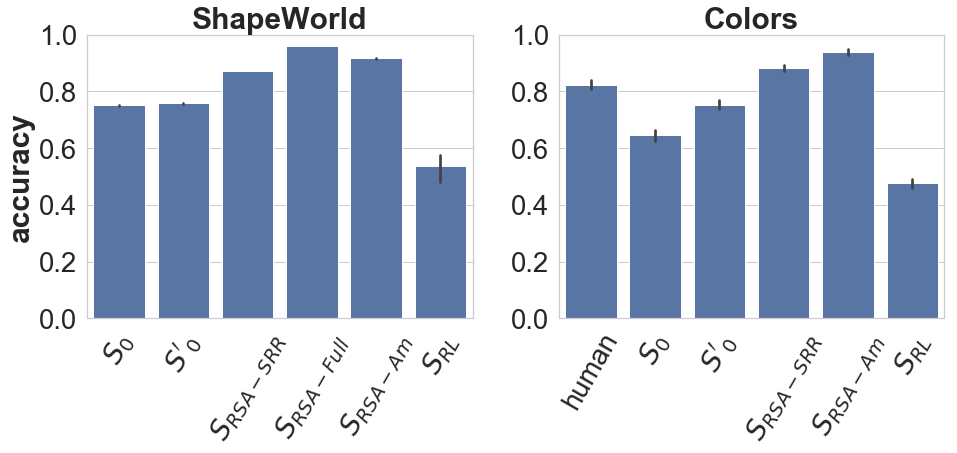

In [79]:
sns.set(style='whitegrid', font_scale=2.5)
plt.figure(figsize=[14,7])
plt.subplot(1,2,1)
plt.xticks(rotation=60)
plt.xlabel('xlabel',visible=False)
sns.barplot(x="model", y="ci_acc", data=shapeworld_random_ci_data, color=palette[0])
plt.ylabel("accuracy",weight='bold')
plt.ylim([0,1])
plt.title('ShapeWorld',weight='bold')
plt.subplot(1,2,2)
plt.xticks(rotation=60)
plt.xlabel('xlabel',visible=False)
sns.barplot(x="model", y="acc", data=colors_random_acc_test_data,color=palette[0])
plt.ylabel('accuracy',visible=False)
plt.ylim([0,1])
plt.title('Colors',weight='bold')
plt.tight_layout()

In [81]:
temp = shapeworld_test_data_1.copy()
shapes_list = []
unk = []
for shapes, colors, length, data, model in zip(temp['shapes'],temp['colors'],temp['length'],temp['data'],temp['model']):
    t = temp.loc[temp['data']==data]
    shapes_list.append(t.loc[t['model']==model]['colors'].mean()+shapes)
    unk.append(length-shapes-colors)
temp['shapes'] = shapes_list

In [82]:
neither_list = []
for neither, data, model in zip(unk,temp['data'],temp['model']):
    t = temp.loc[temp['data']==data]
    neither_list.append(t.loc[t['model']==model]['shapes'].mean()+neither)
temp['neither'] = neither_list

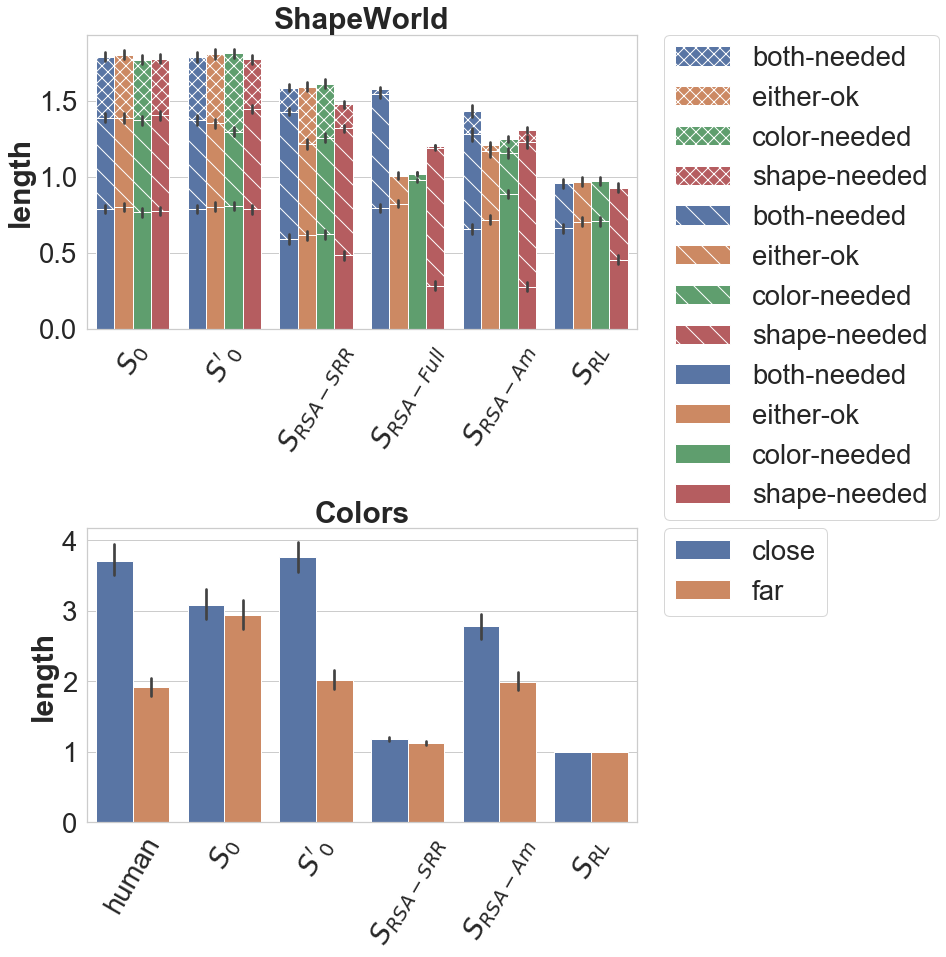

In [83]:
sns.set(style='whitegrid', font_scale=2.5)
plt.figure(figsize=[14,14])
plt.subplot(2,1,1)
plt.xticks(rotation=60)
plt.xlabel('xlabel',visible=False)
top = sns.barplot(x="model", y="neither", hue_order=['both-needed','either-ok','color-needed','shape-needed'], hue="data", data=temp, hatch='xx')
middle = sns.barplot(x="model", y="shapes", hue_order=['both-needed','either-ok','color-needed','shape-needed'], hue="data", data=temp, hatch='\\')
bottom = sns.barplot(x="model", y="colors", hue_order=['both-needed','either-ok','color-needed','shape-needed'], hue="data", data=shapeworld_test_data_1)
plt.ylabel("length",weight="bold")
plt.legend(frameon=True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend().remove()
plt.title('ShapeWorld',weight='bold')

plt.subplot(2,1,2)
plt.xticks(rotation=60)
plt.xlabel('xlabel',visible=False)
sns.barplot(x="model", y="length", hue_order=['close','far'], hue="data", data=colors_test_data_1)
plt.ylabel("length",weight='bold')
plt.legend(frameon=True, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Colors',weight='bold')
plt.tight_layout()

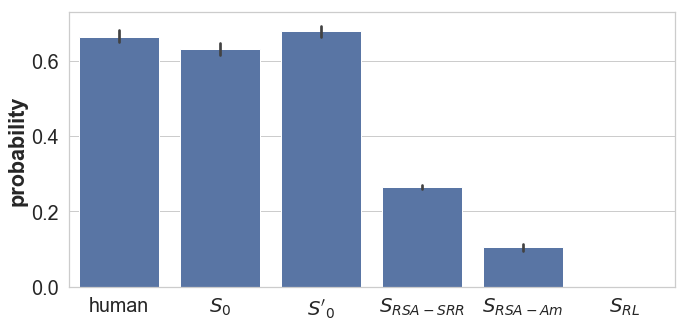

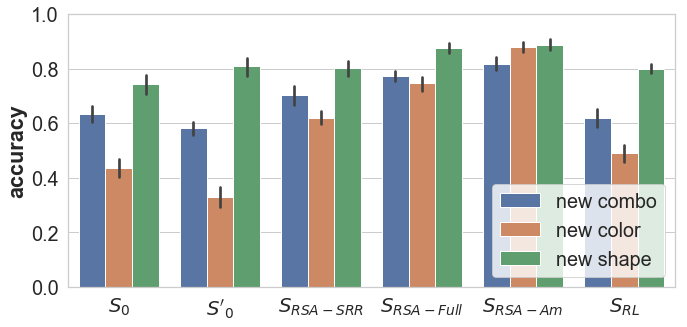

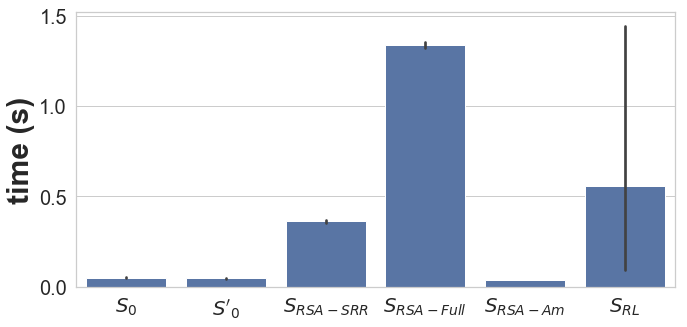

In [80]:
sns.set(style='whitegrid', font_scale=1.8)

plt.figure(figsize=[10,5])
plt.xticks(rotation=0)
plt.xlabel('xlabel',visible=False)
sns.barplot(x="model", y="prob", data=colors_random_test_data,color=palette[0])
plt.ylabel("probability",weight='bold')
plt.tight_layout()

plt.figure(figsize=[10,5])
plt.xticks(rotation=0)
plt.xlabel('xlabel',visible=False)
sns.barplot(x="model", y="acc", hue="data", data=generalization_test_data)
plt.ylabel("accuracy",weight='bold')
plt.ylim([0,1])
plt.legend(frameon=True,loc='lower right')
plt.tight_layout()

plt.figure(figsize=[10,5])
plt.xticks(rotation=0)
plt.xlabel('xlabel',visible=False)
sns.barplot(x="model", y="time", data=shapeworld_random_acc_test_data, color=palette[0])
plt.ylabel("time (s)",fontsize=30,weight='bold')
plt.tight_layout()